In [1]:
import pandas as pd
import numpy as np
import os

# Phase 1: Exploratory Data Analysis

We look at data and figure out if it's clean, what modification we need, what correlations we can draw, how to make it suitable for machine learning, etc

### 1.0 Importing data 
We begin by joining all the raw data files from the folder

In [2]:
raw_data_path = os.path.join(os.path.pardir, 'data', 'raw')
train_file_path = os.path.join(raw_data_path, 'train.csv')
test_file_path = os.path.join(raw_data_path, 'test.csv')

We begin by reading all the files into pandas data frame

In [3]:
train_df = pd.read_csv(train_file_path, index_col='PassengerId')
test_df = pd.read_csv(test_file_path, index_col='PassengerId')

### 1.2 Basic structure of data
We use head, concat and loc to take a look at the data

In [4]:
#We take a look at the basic structure of both training and test data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


We begin by giving a Survived column to the test data

In [6]:
test_df['Survived'] = -888

Concatenates two data frames horizontally
We begin by joining both the training and the test data frames, so both data can be used for ML later on
We need to apply the same data manipulation and munging for both training and test so we might as well do it together

In [7]:
df = pd.concat([train_df, test_df], axis=0) 

Take a look at the joint data frame

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


Take a look at the first five rows to get an idea

In [9]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450


This is super important - the loc operator can be used to localize data by row specififers and column lists

In [10]:
df.loc[5:10, 'Name': 'Ticket'] #First index is row list, second is column slicing

,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,
5,"Allen, Mr. William Henry",0,3,male,0,0,373450
6,"Moran, Mr. James",0,3,male,0,0,330877
7,"McCarthy, Mr. Timothy J",0,1,male,0,0,17463
8,"Palsson, Master. Gosta Leonard",1,3,male,3,0,349909
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,1,347742
10,"Nasser, Mrs. Nicholas (Adele Achem)",0,2,female,1,1,237736


In [11]:
df.loc[df.Parch==1, 'Sex':'Ticket' ]

,Sex,SibSp,Survived,Ticket
PassengerId,,,,
8,male,3,0,349909
11,female,1,1,PP 9549
17,male,4,0,382652
25,female,3,0,349909
51,male,4,0,3101295
55,male,0,0,113509
66,male,1,1,2661
98,male,0,1,PC 17759
99,female,0,1,231919


In [12]:
df.tail() #Check out the last five rows

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1305,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,3,male,0,-888,A.5. 3236
1306,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1,female,0,-888,PC 17758
1307,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,3,male,0,-888,SOTON/O.Q. 3101262
1308,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,3,male,0,-888,359309
1309,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,3,male,1,-888,2668


### 1.3 Centrality measures on the data & Plotting basics
Run the data for all centrality measures like mean, median, std, var, count, quartiles, etc

In [13]:
df.describe() #Get all statistics for all columns - like mean, std dev, count, 25th percentile, 50th percentil, etc

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,-283.301757
std,14.413493,51.758668,0.865560,0.837836,1.041658,414.337413
min,0.170000,0.000000,0.000000,1.000000,0.000000,-888.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,-888.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


How to get mean (or any centrality measure) manually for any column

In [14]:
print 'Mean', df.Fare.mean() #Mean is the average
print 'Median', df.Fare.median() #Median is the number in the middle
print 'Variance', df.Fare.var() # Used to know spread = sum(squares(each_val))/count
print 'Std deviation', df.Fare.std() # Sq root of variance = used widely to calculate spread
print 'Percentile', df.Fare.quantile(0.75) # 75th percentile - 75% of the values are below this result

Mean 33.2954792813
Median 14.4542
Variance 2678.95973789
Std deviation 51.7586682392
Percentile 31.275


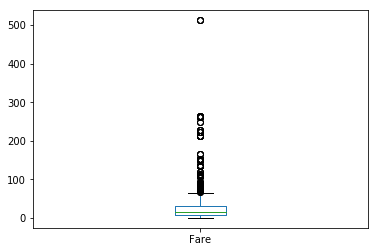

In [15]:
%matplotlib inline
df.Fare.plot(kind='box') #Create a box plot!

Instead of getting 'central measures' like mean, we can get absolute measures too, like count and proportions

In [16]:
df.describe(include='all') 

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309,1309.000000,1309.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Connolly, Miss. Kate",NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,2.294882,NaN,0.498854,-283.301757,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,0.837836,NaN,1.041658,414.337413,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,NaN,0.000000,-888.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,2.000000,NaN,0.000000,-888.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,3.000000,NaN,1.000000,1.000000,NaN


An awesomely useful feature - to get the counts for even divisions in the data like sex of the passenger

In [17]:
df.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [18]:
df.Sex.value_counts(normalize=True) #Just as useful - get percentages

male      0.644003
female    0.355997
Name: Sex, dtype: float64

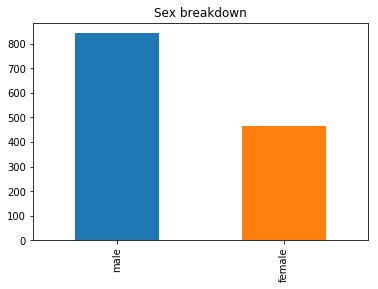

In [19]:
df.Sex.value_counts().plot(title='Sex breakdown', kind='bar')

### 1.4 Non centrality measures - distribution, scatter, distribution plots

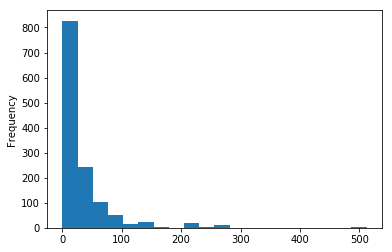

In [20]:
df.Fare.plot(kind='hist', bins=20) #histogram of distribution of fare

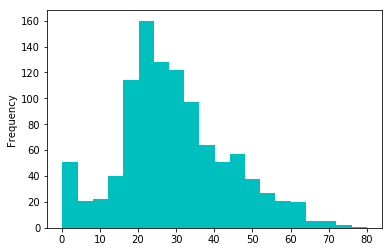

In [21]:
df.Age.plot(kind='hist', bins=20, color='c')

### Scatter plot

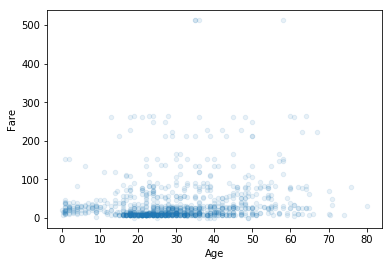

In [22]:
df.plot.scatter(x='Age', y='Fare', alpha=0.1)

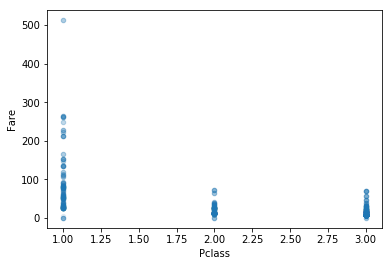

In [23]:
df.plot.scatter(x='Pclass', y='Fare', alpha=0.1)

### 1.5 Grouping and aggregation - Very important
This is how you can relate different columns together - groupby, crosstab, and pivot_table

In [24]:
df.groupby('Sex').Age.median() #Of the females, get the median age

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [25]:
df.groupby('Sex').Fare.median() #Whoa women paid more fare

Sex
female    23.0000
male      11.8875
Name: Fare, dtype: float64

Multiple group by

In [26]:
df.groupby(['Sex', 'Pclass']).Fare.median() 

Sex     Pclass
female  1         80.92915
        2         23.00000
        3         10.48960
male    1         49.50420
        2         13.00000
        3          7.89580
Name: Fare, dtype: float64

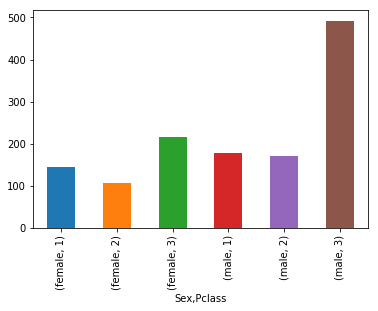

In [27]:
df.groupby(['Sex', 'Pclass']).Fare.count().plot(kind='bar')

Multiple groups, and multiple aggregations

In [28]:
df.groupby(['Sex', 'Pclass'])['Fare', 'Age'].median()
#So, younger men & women paid less to be in cheaper classes

Fare   Age
Sex    Pclass                
female 1       80.92915  36.0
       2       23.00000  28.0
       3       10.48960  22.0
male   1       49.50420  42.0
       2       13.00000  29.5
       3        7.89580  25.0

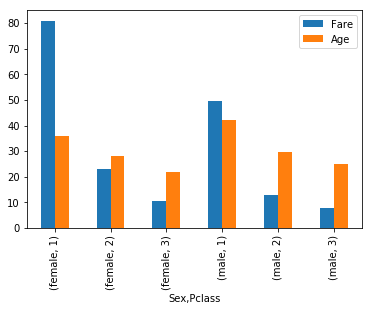

In [29]:
df.groupby(['Sex', 'Pclass'])['Fare', 'Age'].median().plot(kind='bar') #Same thing in visual form

What if the median wasn't the only aggregation you wanted?
Now I can see the mean fare, and median age
So a typical female third class passenger was about 22, and averaged a fare of 15

In [30]:
df.groupby(['Sex', 'Pclass']).agg({'Fare' : 'mean', 'Age':'median'})

Fare   Age
Sex    Pclass                  
female 1       109.412385  36.0
       2        23.234827  28.0
       3        15.324250  22.0
male   1        69.888385  42.0
       2        19.904946  29.5
       3        12.415462  25.0

And much more complex grouping and aggregation is possible!

In [31]:
df.groupby(['Sex', 'Pclass']).agg(
    {'Fare' : {
        'mean_fare': 'mean',
        'median_fare': 'median',
        'max_fare': max,
        'range_fare': lambda x: max(x) - min(x) #Check it out, can use lambdas for special fns
    }, 
     'Age':'median'}
)

/anaconda2/lib/python2.7/site-packages/pandas/core/groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Fare                                     Age
                mean_fare range_fare  max_fare median_fare median
Sex    Pclass                                                    
female 1       109.412385   486.6292  512.3292    80.92915   36.0
       2        23.234827    54.5000   65.0000    23.00000   28.0
       3        15.324250    62.8000   69.5500    10.48960   22.0
male   1        69.888385   512.3292  512.3292    49.50420   42.0
       2        19.904946    73.5000   73.5000    13.00000   29.5
       3        12.415462    69.5500   69.5500     7.89580   25.0

#### JUST as important are crostabs - they help you view data stats side by side in tabulated format

In [32]:
pd.crosstab(df.Sex, df.Pclass)

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


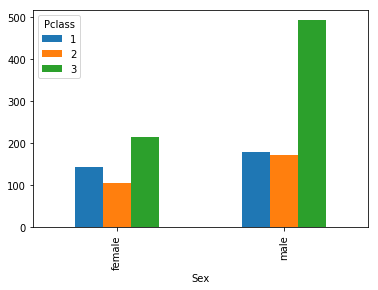

In [33]:
pd.crosstab(df.Sex, df.Pclass).plot(kind='bar')

#### Another super useful thing to use day in and out - pivot tables
Basically you use two columns you want tabulated against (Sex and Pclass), and then specify what you'd like to show in those columns (Age?), and then how it must be shown (mean/median/std)?

In [34]:
df.pivot_table(index = 'Sex', columns ='Pclass', values='Age', aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


# Phase 2. Data munging
## Imputation, dealing with outliers, missing data and feature engineering 

### 2.0 Dealing with missing data - median, mean imputation
We need to deal with impure data - extreme values, missing data values and also engineer a few features (columns) together so we can be ready for ML. We use awesome functions like isnull, fillna, and map! 

Let's figure out what values have null or are missing - run the info
And see which columns don't add up to total number of entries (1309 entries)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


We can see that fare, Embarked, Age and cabin are less than 1309, which means missing entries
Let's focus on Embarked now.
Find null values or missing values

In [36]:
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1,113572


Maybe their fare is a clue - they paid 80 bucks.
Figure out the median fare for different embarkment points

In [37]:
df.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

They most likely boarded at C - so fill that in

In [38]:
df.Embarked.fillna('C', inplace=True)

In [39]:
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,-888,3701


In [40]:
df.loc[(df.Embarked == 'S') & (df.Pclass == 3), 'Fare'].median()

8.05

In [41]:
df.Fare.fillna(8.05, inplace=True)

Age is a lot harder - find out the title first and then get median ages.
We use a lambda function to get the titles

In [42]:
def GetTitle(name):
    first_name = name.split(',')[1]
    title = first_name.split('.')[0]
    title = title.strip().lower()
    return title


In [43]:
df.Name.map(GetTitle).unique() #Check out all the unique titles:

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer', 'dona'], dtype=object)

In [44]:
def GetTitle(name):
    title_d = {
        'mr': 'Mr', 
        'mrs' : 'Mrs', 
        'miss': 'Miss', 
        'master': 'Master', 
        'don': 'Sir', 
        'rev': 'Sir', 
        'dr': 'Officer', 
        'mme': 'Mrs', 
        'ms' : 'Mrs',
       'major': 'Officer', 
        'lady': 'Lady', 
        'sir' : 'Sir', 
        'mlle': 'Miss', 
        'col' : 'Officer', 
        'capt' : 'Officer', 
        'the countess' : 'Lady',
       'jonkheer' : 'Sir', 
        'dona' : 'Lady'
    }
    first_name = name.split(',')[1]
    title = first_name.split('.')[0]
    title = title.strip().lower()
    return title_d[title]


In [45]:
df['Title'] = df.Name.map(GetTitle) #Create a new columns for title

In [46]:
title_age_median = df.groupby('Title').Age.transform('median') #Get median age for each title
title_age_median

PassengerId
1       29.0
2       35.0
3       22.0
4       35.0
5       29.0
6       29.0
7       29.0
8        4.0
9       35.0
10      35.0
11      22.0
12      22.0
13      29.0
14      29.0
15      22.0
16      35.0
17       4.0
18      29.0
19      35.0
20      35.0
21      29.0
22      29.0
23      22.0
24      29.0
25      22.0
26      35.0
27      29.0
28      29.0
29      22.0
30      29.0
        ... 
1280    29.0
1281     4.0
1282    29.0
1283    35.0
1284     4.0
1285    29.0
1286    29.0
1287    35.0
1288    29.0
1289    35.0
1290    29.0
1291    29.0
1292    22.0
1293    29.0
1294    22.0
1295    29.0
1296    29.0
1297    29.0
1298    29.0
1299    29.0
1300    22.0
1301    22.0
1302    22.0
1303    35.0
1304    22.0
1305    29.0
1306    39.0
1307    29.0
1308    29.0
1309     4.0
Name: Age, Length: 1309, dtype: float64

In place filling!

In [47]:
df.Age.fillna(title_age_median, inplace=True)

In [48]:
#Done!
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
Title       1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 172.9+ KB


### 2.1 Binning and treating outliers

The fare is one of those columns which contain outliers. Here's how we can know:

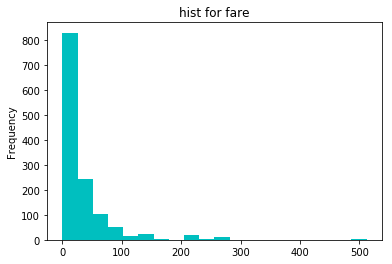

In [49]:
df.Fare.plot(kind='hist', bins=20, title='hist for fare', color='c')

In [50]:
df.loc[df.Fare == df.Fare.max()] #Let's check out how many passengers paid max fare

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
259,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,1,female,0,1,PC 17755,Miss
680,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,1,male,0,1,PC 17755,Mr
738,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,1,male,0,1,PC 17755,Mr
1235,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1,female,0,-888,PC 17755,Mrs


#### 2.1.1 Categorical feature outliter treatment
Method 1: Log transform those values

Using np.log to eliminate some of the skewness - we can take the log of the values instead of actual values

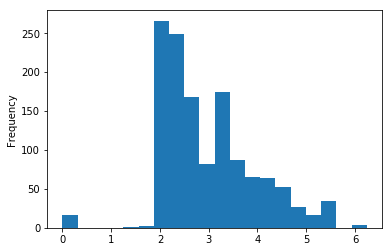

In [51]:
Logfare = np.log(df.Fare + 1) #+1 because log(0) is not defined
Logfare.plot(kind='hist', bins=20)

Now for the binning treatment - we can assign fares into different bins 

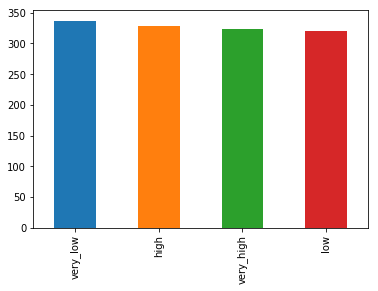

In [52]:
pd.qcut(df.Fare, 4, labels =['very_low', 'low', 'high', 'very_high']).value_counts().plot(kind='bar')

Much better like this, so lets store the Bin for fare as a column

In [53]:
df['Fare_Bin'] = pd.qcut(df.Fare, 4, labels =['very_low', 'low', 'high', 'very_high'])

### 2.2 Feature Engineering
We use the awesome np.where function which can help us create a column based on a condition!

#### Feature: Age state (adult v child)

In [54]:
#First let's see if we can create a featur based on age and survival (since kids were prioritized)
df['AgeState'] = np.where(df['Age'] >= 18, 'Adult', 'Child')

In [55]:
#Now let's look at survival ratios for adults vs kids
pd.crosstab(df[df.Survived != -888].AgeState, df[df.Survived != -888].Survived)

Survived,0,1
AgeState,,
Adult,495,279
Child,54,63


#### Feature FamilySize

In [56]:
df['FamilySize'] = df.Parch + df.SibSp + 1
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].FamilySize)

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


#### Feature IsMother

In [57]:
df['IsMother'] = np.where(((df.Sex=='female') & (df.Parch > 0) & (df.Title != 'Miss') & (df.Age > 18)), 1, 0 )  

In [58]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].IsMother)

IsMother,0,1
Survived,,
0,533,16
1,303,39


#### Feature Deck

In [59]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [60]:
df.loc[df.Cabin=='T', 'Cabin'] = np.NaN #Do some munging for that 'T' and the NaNs

Make the 'Deck' feature.

If the deck info exists, grab first letter, if not, assign 'T' to deck

In [61]:
df['Deck'] = df['Cabin'].map(lambda x: np.where(pd.notnull(x),str(x)[0].upper(),'Z'))

In [62]:
df.Deck.value_counts()

Z    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: Deck, dtype: int64

In [63]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].Deck) #And our familiar little crosstabs to the rescue!

Deck,A,B,C,D,E,F,G,Z
Survived,,,,,,,,
0,8,12,24,8,8,5,2,482
1,7,35,35,25,24,8,2,206


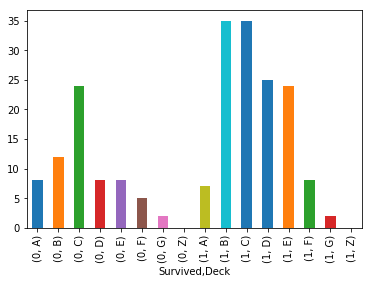

In [64]:
df[df['Survived']!=-888].groupby(['Survived', 'Deck'])['Cabin'].count().plot(kind='bar')

### 2.3 Feature Encoding
Ideally we'd like all our data to be numerical. However, we have some that are categorical as well.
So, we can use the handy dummies function of pandas to get a numerical representation using a technique known as 'One Hot Encoding'

#### 2.3.0 Dropping columns and using the magic of getting dummies for one hot encoding

In [65]:
df['isMale'] = np.where(df.Sex == 'male', 1, 0)
df = pd.get_dummies(df, columns=['Deck', 'Pclass', 'Title', 'Fare_Bin', 'Embarked', 'AgeState'])

And, now we have lots more columns, containing numerical representations of each of the above fields.
For example, AgeState is now AgeState_Adult, and AgeState_Child based on the string values, and will have 0/1 values.
SHEER MAGIC!

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 39 columns):
Age                   1309 non-null float64
Cabin                 294 non-null object
Fare                  1309 non-null float64
Name                  1309 non-null object
Parch                 1309 non-null int64
Sex                   1309 non-null object
SibSp                 1309 non-null int64
Survived              1309 non-null int64
Ticket                1309 non-null object
FamilySize            1309 non-null int64
IsMother              1309 non-null int64
isMale                1309 non-null int64
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pcla

Now we can drop off the string (categorical) features

In [67]:
df.drop(['Cabin', 'Name', 'Ticket', 'Parch', 'SibSp', 'Sex'], axis = 1, inplace=True)

#### 2.3.1 Column reordering
Now let's bring that Survived column to the front

In [68]:
columns = [column for column in df.columns if column != 'Survived']
columns = ['Survived'] + columns
df = df[columns]

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 33 columns):
Survived              1309 non-null int64
Age                   1309 non-null float64
Fare                  1309 non-null float64
FamilySize            1309 non-null int64
IsMother              1309 non-null int64
isMale                1309 non-null int64
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pclass_2              1309 non-null uint8
Pclass_3              1309 non-null uint8
Title_Lady            1309 non-null uint8
Title_Master          1309 non-null uint8
Title_Miss            1309 non-null uint8
Title_Mr              1309 non-null uint8
Title_M

Save the data into the processed folder - separate training and test

In [70]:
processed_data_path = os.path.join(os.path.pardir, 'data', 'processed')
write_train_file_path = os.path.join(processed_data_path, 'train.csv')
write_test_file_path = os.path.join(processed_data_path, 'test.csv')

Write the train file path, and then reorder the columns before the test file path

In [71]:
df.loc[df.Survived != -888].to_csv(write_train_file_path)
columns = [column for column in df.columns if column != 'Survived']
df.loc[df.Survived == -888].to_csv(write_test_file_path)

# Phase 3: Machine learning

In [72]:
import sklearn
sklearn.__version__

'0.19.1'

Begin by importing the files:

In [73]:
processed_data_path = os.path.join(os.path.pardir, 'data', 'processed')
train_file_path = os.path.join(processed_data_path, 'train.csv')
test_file_path = os.path.join(processed_data_path, 'test.csv')

In [74]:
train_df = pd.read_csv(train_file_path, index_col='PassengerId')
test_df = pd.read_csv(test_file_path, index_col='PassengerId')

### 3.1 Prep data into training and test data
We will divide the training data into matrices and then use that for ML ops

In [75]:
X = train_df.loc[:, 'Age':].as_matrix().astype('float')
y = train_df['Survived'].ravel()

Now split into training and test data

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### 3.2 Build a baseline model

In [77]:
from sklearn.dummy import DummyClassifier
model_dummy = DummyClassifier(strategy='most_frequent', random_state=0)

In [78]:
model_dummy.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=0, strategy='most_frequent')

Evaluate scores and performance for the baseline model

In [80]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
model_dummy.score(X_test, y_test)

0.6145251396648045

In [81]:
accuracy_score(y_test, model_dummy.predict(X_test))

0.6145251396648045

In [82]:
confusion_matrix(y_test, model_dummy.predict(X_test))

array([[110,   0],
       [ 69,   0]])

In [83]:
precision_score(y_test, model_dummy.predict(X_test))

/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [84]:
recall_score(y_test, model_dummy.predict(X_test))

0.0

### 3.3 Building better than baseline model - A logistic regression model

In [85]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(random_state=0)
model_lr.fit(X_train, y_train)
model_lr.score(X_test, y_test)

0.8324022346368715

Our score is now much better than the baseline model!

### 3.4 Optimizing our log regression model

We can optimize parameters to fit our model better

In [89]:
model_lr_opt = LogisticRegression(random_state=0)
from sklearn.model_selection import GridSearchCV
parameters = {
    'C': [1, 10, 50, 100, 1000],
    'penalty': ['l1', 'l2']
}
clf = GridSearchCV(model_lr_opt, param_grid = parameters, cv=3) #Cross validation of 3
clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [1, 10, 50, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [90]:
clf.best_params_

{'C': 1, 'penalty': 'l1'}

In [91]:
clf.best_score_

0.8328651685393258

This is slightly better.

### 3.4 Feature normalization and standard scalers 

#### 3.4.1 Feature normalization using MinMaxScaler

In [95]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_lr_opt_scaled = LogisticRegression(random_state=0)
from sklearn.model_selection import GridSearchCV
parameters = {
    'C': [1, 10, 50, 100, 1000],
    'penalty': ['l1', 'l2']
}
clf = GridSearchCV(model_lr_opt_scaled, param_grid = parameters, cv=3) #Cross validation of 3
clf.fit(X_train_scaled, y_train)
clf.best_score_

0.827247191011236

#### 3.4.2 Feature standardization using StandardScaler

In [96]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_lr_opt_scaled = LogisticRegression(random_state=0)
from sklearn.model_selection import GridSearchCV
parameters = {
    'C': [1, 10, 50, 100, 1000],
    'penalty': ['l1', 'l2']
}
clf = GridSearchCV(model_lr_opt_scaled, param_grid = parameters, cv=3) #Cross validation of 3
clf.fit(X_train_scaled, y_train)
clf.best_score_

0.8132022471910112

# And that's all folks!